In [1]:
import pandas as pd
import numpy as np

print("Pandas Version : {}".format(pd.__version__))
print("Numpy Version : {}".format(np.__version__))

Pandas Version : 1.4.4
Numpy Version : 1.23.4


In [2]:
data = np.random.rand(int(1e5), 5)

df = pd.DataFrame(data=data, columns=list("ABCDE"))
df["Type"] = np.random.choice(["Class1","Class2"], size=(len(df)))

df

,A,B,C,D,E,Type
0,0.645322,0.381760,0.780016,0.391836,0.160287,Class2
1,0.935891,0.064765,0.711892,0.954719,0.571948,Class1
2,0.687466,0.535056,0.577430,0.296696,0.156609,Class2
3,0.293840,0.330945,0.431215,0.559533,0.900497,Class2
4,0.899992,0.808217,0.393282,0.106260,0.127870,Class2
...,...,...,...,...,...,...
99995,0.297726,0.220295,0.874988,0.648917,0.492119,Class1
99996,0.228060,0.295026,0.576112,0.444250,0.267162,Class1
99997,0.951125,0.552438,0.475624,0.612973,0.868805,Class2
99998,0.848609,0.635970,0.437084,0.815549,0.499015,Class2


In [8]:
rolling_df = df.iloc[:, :-1].rolling(1000)

rolling_df

Rolling [window=1000,center=False,axis=0,method=single]

In [9]:
grouped_by_types = df.groupby("Type")

grouped_by_types

# Example 1: Numba with Pandas Series

In [14]:
%time out = rolling_df.mean()

%time out = rolling_df.mean(engine='cython')

%time out = rolling_df.mean(engine='numba')

CPU times: user 14.1 ms, sys: 402 µs, total: 14.5 ms
Wall time: 12.9 ms
CPU times: user 12.6 ms, sys: 0 ns, total: 12.6 ms
Wall time: 12.2 ms
CPU times: user 5.62 ms, sys: 2.26 ms, total: 7.88 ms
Wall time: 7.6 ms


# Example 2: Numba with Numpy Arrays

In [15]:
%time out = rolling_df.mean(raw=True)

%time out = rolling_df.mean(engine='cython', raw=True)

%time out = rolling_df.mean(engine='numba', raw=True)

CPU times: user 12.1 ms, sys: 0 ns, total: 12.1 ms
Wall time: 10.9 ms
CPU times: user 10.6 ms, sys: 0 ns, total: 10.6 ms
Wall time: 10.2 ms
CPU times: user 7.89 ms, sys: 0 ns, total: 7.89 ms
Wall time: 7.4 ms


In [16]:
%time out = rolling_df.std(raw=True)

%time out = rolling_df.std(engine='cython', raw=True)

%time out = rolling_df.std(engine='numba', raw=True)

CPU times: user 14.1 ms, sys: 4.15 ms, total: 18.3 ms
Wall time: 16.7 ms
CPU times: user 13.3 ms, sys: 245 µs, total: 13.5 ms
Wall time: 13.4 ms
CPU times: user 11.2 ms, sys: 11 µs, total: 11.2 ms
Wall time: 11.1 ms


# Example 3: Numba with Arguments

In [42]:
%time out = rolling_df.std(raw=True)

%time out = rolling_df.std(engine='cython', raw=True)

%time out = rolling_df.std(engine='numba', nopython=True, raw=True)

%time out = rolling_df.std(engine='numba', nopython=True, cache=True, raw=True)

%time out = rolling_df.std(engine='numba', nopython=True, cache=True, parallel=True, raw=True)

CPU times: user 11.2 ms, sys: 7.93 ms, total: 19.1 ms
Wall time: 17.5 ms
CPU times: user 16.2 ms, sys: 4 µs, total: 16.2 ms
Wall time: 15.6 ms
CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 11.2 ms
CPU times: user 11.1 ms, sys: 52 µs, total: 11.2 ms
Wall time: 10.8 ms
CPU times: user 11.2 ms, sys: 0 ns, total: 11.2 ms
Wall time: 10.5 ms


# Example 4: Numba with Custom Functions

In [18]:
def custom_mean(x):
    return (x * x).mean()

In [20]:
%time out = rolling_df.apply(custom_mean, raw=True)

%time out = rolling_df.apply(custom_mean, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean, engine='numba', raw=True)

CPU times: user 2.89 s, sys: 392 µs, total: 2.89 s
Wall time: 2.88 s
CPU times: user 2.88 s, sys: 3.62 ms, total: 2.89 s
Wall time: 2.89 s
CPU times: user 1.23 s, sys: 117 µs, total: 1.23 s
Wall time: 1.23 s


In [43]:
from numba import jit

def func(values, index):
    return values.mean()

%time out = grouped_by_types.agg('mean')

%time out = grouped_by_types.agg('mean', engine='cython')

%time out = grouped_by_types.agg(func, engine='numba')

CPU times: user 3.61 ms, sys: 19 µs, total: 3.63 ms
Wall time: 2.46 ms
CPU times: user 1.74 ms, sys: 16 µs, total: 1.76 ms
Wall time: 1.5 ms
CPU times: user 296 ms, sys: 3.93 ms, total: 300 ms
Wall time: 298 ms


# Example 5: Pandas with Numba jit

In [22]:
from numba import jit, njit, vectorize, float64

def custom_mean(x):
    return (x * x).mean()

@jit(cache=True)
def custom_mean_jitted(x):
    return (x * x).mean()

In [23]:
%time out = rolling_df.apply(custom_mean, raw=True)

%time out = rolling_df.apply(custom_mean_jitted, raw=True)

%time out = rolling_df.apply(custom_mean, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean_jitted, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean, engine='numba', raw=True)

%time out = rolling_df.apply(custom_mean_jitted, engine='numba', raw=True)

CPU times: user 2.9 s, sys: 143 µs, total: 2.9 s
Wall time: 2.9 s
CPU times: user 951 ms, sys: 0 ns, total: 951 ms
Wall time: 949 ms
CPU times: user 2.87 s, sys: 3.87 ms, total: 2.87 s
Wall time: 2.87 s
CPU times: user 856 ms, sys: 0 ns, total: 856 ms
Wall time: 854 ms
CPU times: user 1.57 s, sys: 48 µs, total: 1.57 s
Wall time: 1.57 s
CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.5 s


# Example 5: Pandas with Numba njit

In [24]:
from numba import jit, njit

def custom_mean(x):
    return (x * x).mean()

@njit(cache=True)
def custom_mean_jittted(x):
    return (x * x).mean()

In [25]:
%time out = rolling_df.apply(custom_mean, raw=True)

%time out = rolling_df.apply(custom_mean_jittted, raw=True)

%time out = rolling_df.apply(custom_mean, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean_jittted, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean, engine='numba', raw=True)

%time out = rolling_df.apply(custom_mean_jittted, engine='numba', raw=True)

CPU times: user 2.89 s, sys: 0 ns, total: 2.89 s
Wall time: 2.88 s
CPU times: user 923 ms, sys: 0 ns, total: 923 ms
Wall time: 922 ms
CPU times: user 2.88 s, sys: 0 ns, total: 2.88 s
Wall time: 2.88 s
CPU times: user 831 ms, sys: 0 ns, total: 831 ms
Wall time: 830 ms
CPU times: user 1.58 s, sys: 0 ns, total: 1.58 s
Wall time: 1.58 s
CPU times: user 1.5 s, sys: 0 ns, total: 1.5 s
Wall time: 1.5 s


# Example 6: Pandas with Numba DataTyep

In [28]:
from numba import jit, njit, float64

def custom_mean(x):
    return (x * x).mean()

@jit(float64(float64[:]), nopython=True, cache=True)
def custom_mean_jitted(x):
    return (x * x).mean()

In [29]:
%time out = rolling_df.apply(custom_mean, raw=True)

%time out = rolling_df.apply(custom_mean_jitted, raw=True)

%time out = rolling_df.apply(custom_mean, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean_jitted, engine='cython', raw=True)

%time out = rolling_df.apply(custom_mean, engine='numba', raw=True)

%time out = rolling_df.apply(custom_mean_jitted, engine='numba', raw=True)

CPU times: user 2.87 s, sys: 62 µs, total: 2.87 s
Wall time: 2.87 s
CPU times: user 922 ms, sys: 0 ns, total: 922 ms
Wall time: 920 ms
CPU times: user 2.88 s, sys: 0 ns, total: 2.88 s
Wall time: 2.88 s
CPU times: user 936 ms, sys: 0 ns, total: 936 ms
Wall time: 935 ms
CPU times: user 1.58 s, sys: 0 ns, total: 1.58 s
Wall time: 1.58 s
CPU times: user 1.4 s, sys: 3.83 ms, total: 1.41 s
Wall time: 1.4 s


# Example 7: Numba with Python Loop

In [45]:
from numba import jit, njit, vectorize, float64

def custom_mean(x):
    return (x * x).mean()

@jit(float64(float64[:]), nopython=True, cache=True)
def custom_mean_loops_jitted(x):
    out = 0.0
    for i in x:
        out += (i*i)
    return out / len(x)

In [47]:
%time out = rolling_df.apply(custom_mean, raw=True)

%time out = rolling_df.apply(custom_mean, engine='numba', raw=True)

%time out = rolling_df.apply(custom_mean_loops_jitted, raw=True)

CPU times: user 2.9 s, sys: 7.83 ms, total: 2.9 s
Wall time: 2.89 s
CPU times: user 1.21 s, sys: 3.93 ms, total: 1.21 s
Wall time: 1.21 s
CPU times: user 689 ms, sys: 0 ns, total: 689 ms
Wall time: 687 ms


# Example 8: Numba with Pandas Existing Function

In [48]:
from numba import jit, njit, vectorize, float64, float32

@jit([float32(float32[:]), float64(float64[:])], nopython=True, cache=True)
def custom_mean(x):
    return x.mean()

In [49]:
%time _ = df[list("ABCDE")].mean()

CPU times: user 11.9 ms, sys: 0 ns, total: 11.9 ms
Wall time: 11.3 ms


In [52]:
%time for col in list("ABCDE"): _ = custom_mean(df[col].values)

CPU times: user 2.83 ms, sys: 7 µs, total: 2.84 ms
Wall time: 2.74 ms


# Example 9: Numba with Vectorize Function

In [39]:
from numba import vectorize, float32, float64

@vectorize([float32(float32), float64(float64)])
def square(x):
    return x**2 + 2

In [40]:
%time out = df.A.apply(lambda x : x**2 + 2)

%time out = (df.A.values * df.A.values) + 2

%time out = square(df["A"].values)

CPU times: user 18.2 ms, sys: 4.04 ms, total: 22.2 ms
Wall time: 21.6 ms
CPU times: user 0 ns, sys: 1.42 ms, total: 1.42 ms
Wall time: 772 µs
CPU times: user 0 ns, sys: 560 µs, total: 560 µs
Wall time: 385 µs


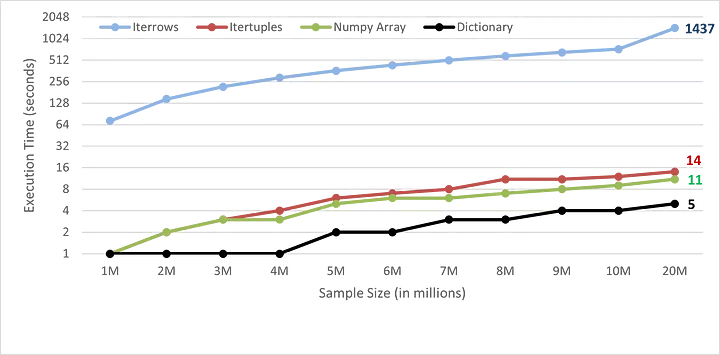

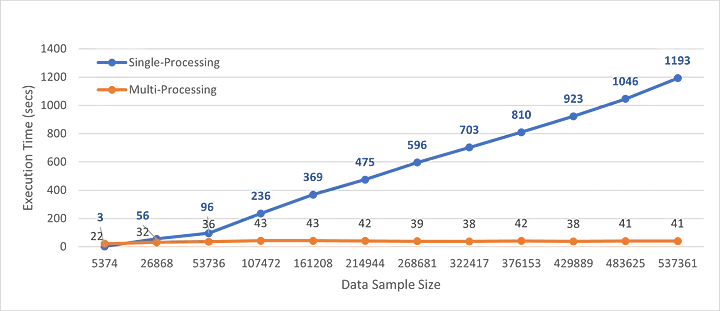